In [1]:
import matplotlib.pyplot as plt
import json
import numpy as np

In [1]:
import sys
sys.path.append(r"C:\Users\Johnk\OneDrive\Desktop\PhD 2024\Quantum Computing Code\Quantum-Computing\SUSY")

In [1]:
from susy_qm import create_vqe_plots

In [3]:
cut_off_list = [2,4,8,16,32]
potential = 'AHO'
folder = 'pop15'
base_path = r"C:\Users\Johnk\OneDrive\Desktop\PhD 2024\Quantum Computing Code\Quantum-Computing\SUSY\PennyLane\SUSY VQE\Shot Noise\Files\{}\\{}\\"

Creating plots
Saving plots
Done


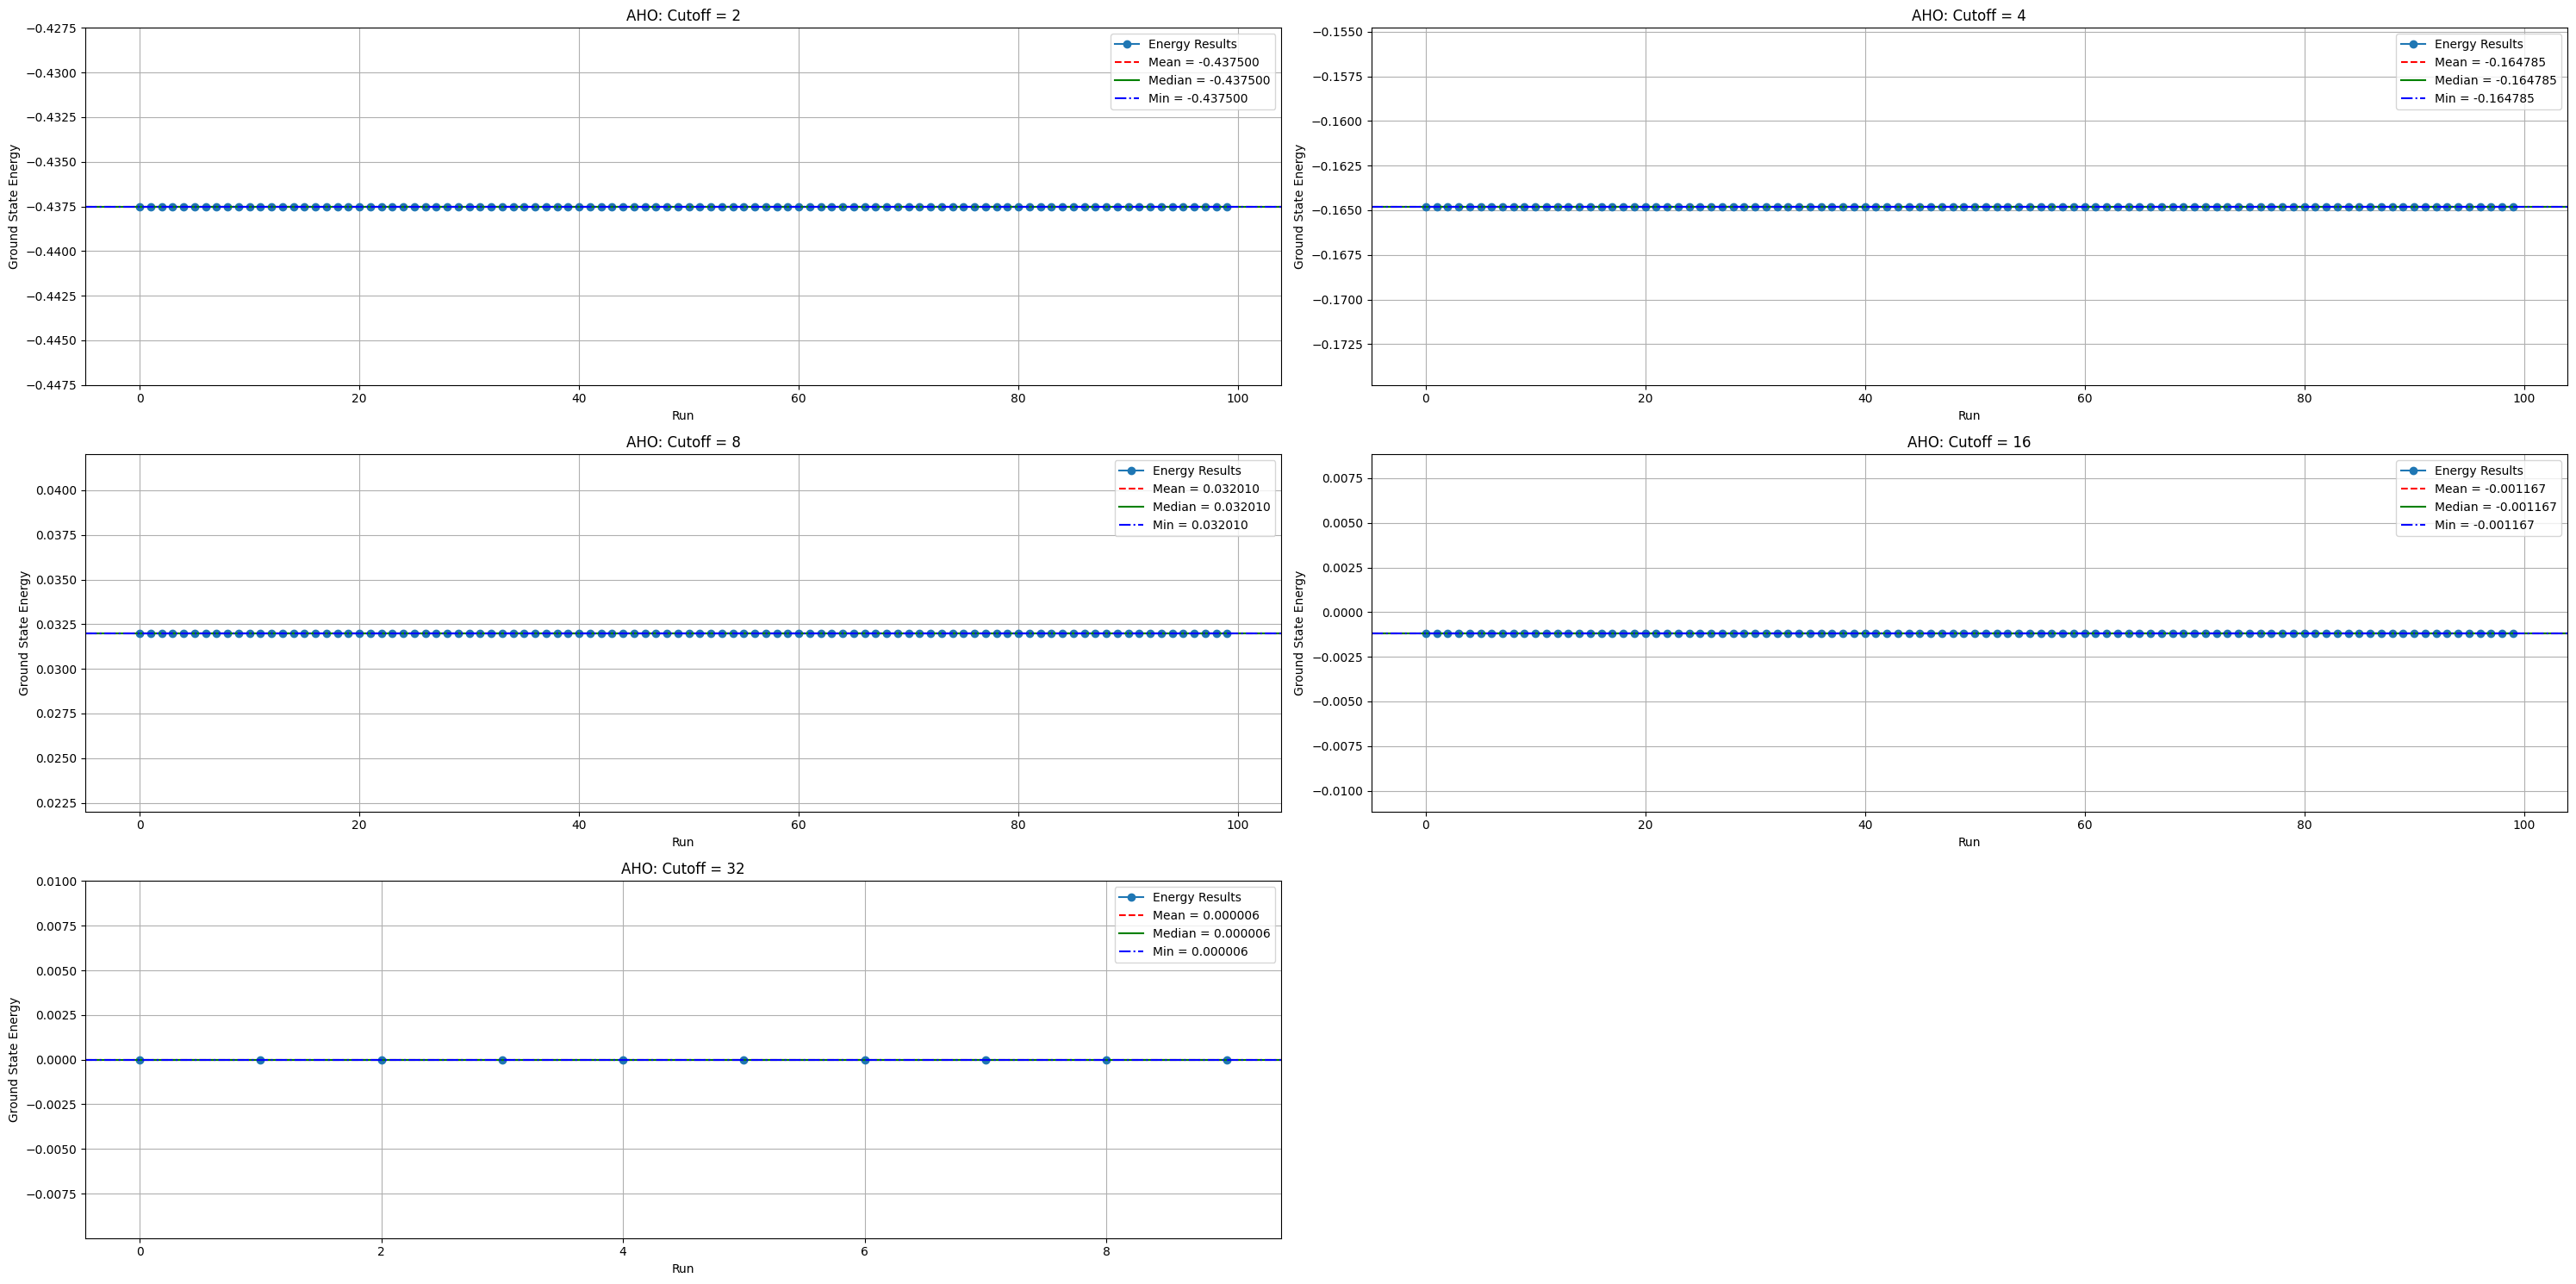

In [5]:
create_vqe_plots(potential, base_path, folder, cut_off_list)

Creating plots
Saving plots
Done


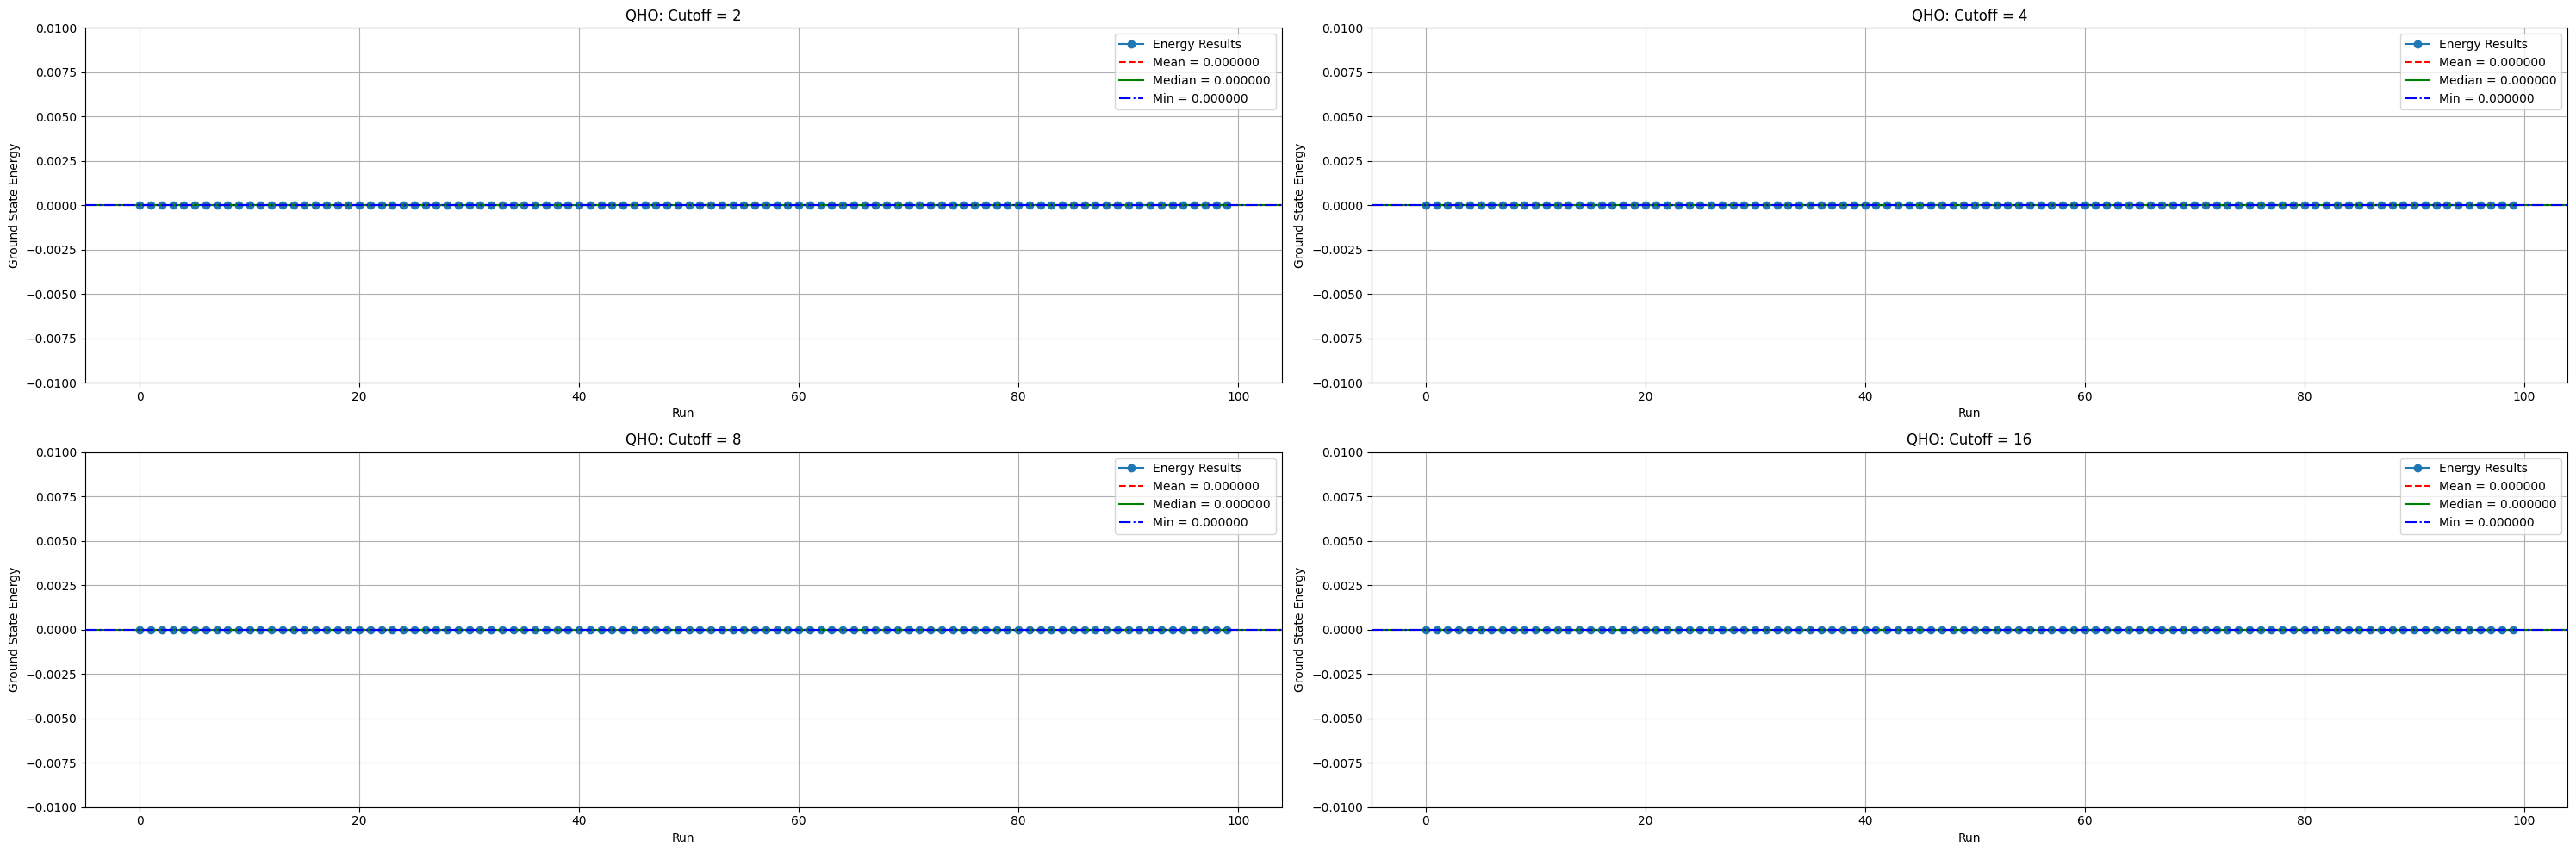

In [13]:
# Load all data and create graphs
print("Creating plots")
data_dict = {}

for n in cut_offs_list:
    file_path = base_path.format(potential, folder) + potential + "_" + str(n) + ".json"
    with open(file_path, 'r') as json_file:
        data_dict[f'c{n}'] = json.load(json_file)


#Create and save plots
num_cutoffs = len(cut_offs_list)
nrows = int(np.ceil(num_cutoffs/2))
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(30, 5*nrows))
axes = axes.flatten()

for idx, (cutoff, cutoff_data) in enumerate(data_dict.items()):
    
    results = cutoff_data['results']
    x_values = range(len(results))

    # Calculating statistics
    mean_value = np.mean(results)
    median_value = np.median(results)
    min_value = np.min(results)

    # Creating the plot
    ax = axes[idx]
    ax.plot(x_values, results, marker='o', label='Energy Results')

    # Plot mean, median, and min lines
    ax.axhline(y=mean_value, color='r', linestyle='--', label=f'Mean = {mean_value:.6f}')
    ax.axhline(y=median_value, color='g', linestyle='-', label=f'Median = {median_value:.6f}')
    ax.axhline(y=min_value, color='b', linestyle='-.', label=f'Min = {min_value:.6f}')

    ax.set_ylim(min_value - 0.01, max(results) + 0.01)
    ax.set_xlabel('Run')
    ax.set_ylabel('Ground State Energy')
    ax.set_title(f"{potential}: Cutoff = {cutoff_data['cutoff']}")
    ax.legend()
    ax.grid(True)

# Hide any remaining unused axes
for idx in range(num_cutoffs, len(axes)):
    fig.delaxes(axes[idx])

print("Saving plots")
plt.tight_layout()
plt.savefig(base_path.format(potential, folder) + "results.png")

print("Done")